In [1]:

# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Actualizar los datos (URL)

url = 'http://cowid.netlify.com/data/full_data.csv'

df = pd.read_csv(url)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [3]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,date,total_cases
681,60,1
682,61,1
683,62,6
684,63,7
685,64,7
686,65,13
687,66,14
688,67,14
689,68,15
690,69,15


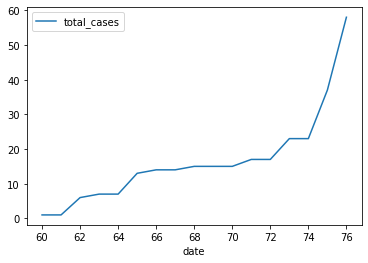

In [4]:

df.plot(x ='date', y='total_cases')

### Modelo Lineal

In [5]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [2.31617647]
Independent term: 
 -140.85294117647064


In [6]:
#Prediccion para 100 dias 
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

90


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


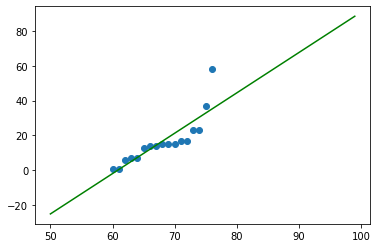

In [7]:
plt.scatter(x, y)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Modelo Logistico

In [8]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-637.69367899,  155.1710206 ]), array([[11872.54041469, -2814.63865054],
       [-2814.63865054,   667.4662425 ]]))


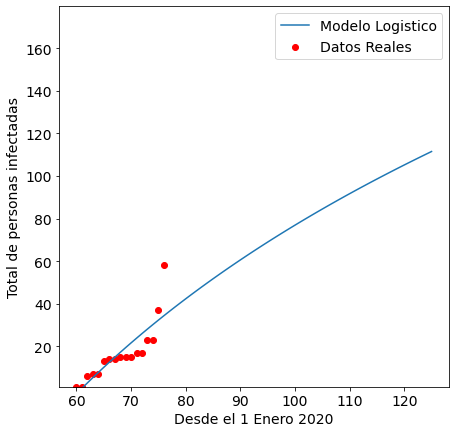

In [9]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

### REGRESIÓN LINEAL CON SKLEARN

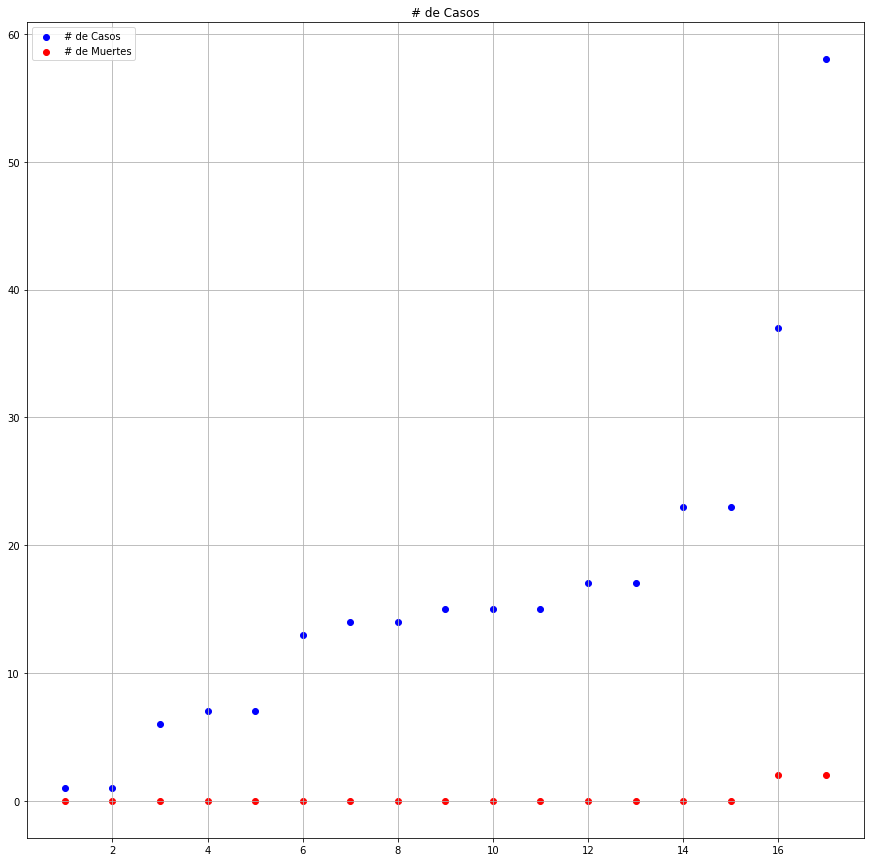

In [11]:
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
#%matplotlib inline # Si quieres hacer estos gráficos dentro de un jupyter notebook
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

df = pd.read_csv(url).fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1) 
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='# de Casos', color='blue')
plt.scatter(x,y1,label='# de Muertes', color='red')
plt.grid(True)
plt.legend()
plt.title('# de Casos');

In [12]:

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 2.316176470588236, b = -4.19852941176471
y = 2.316176470588236x -4.19852941176471


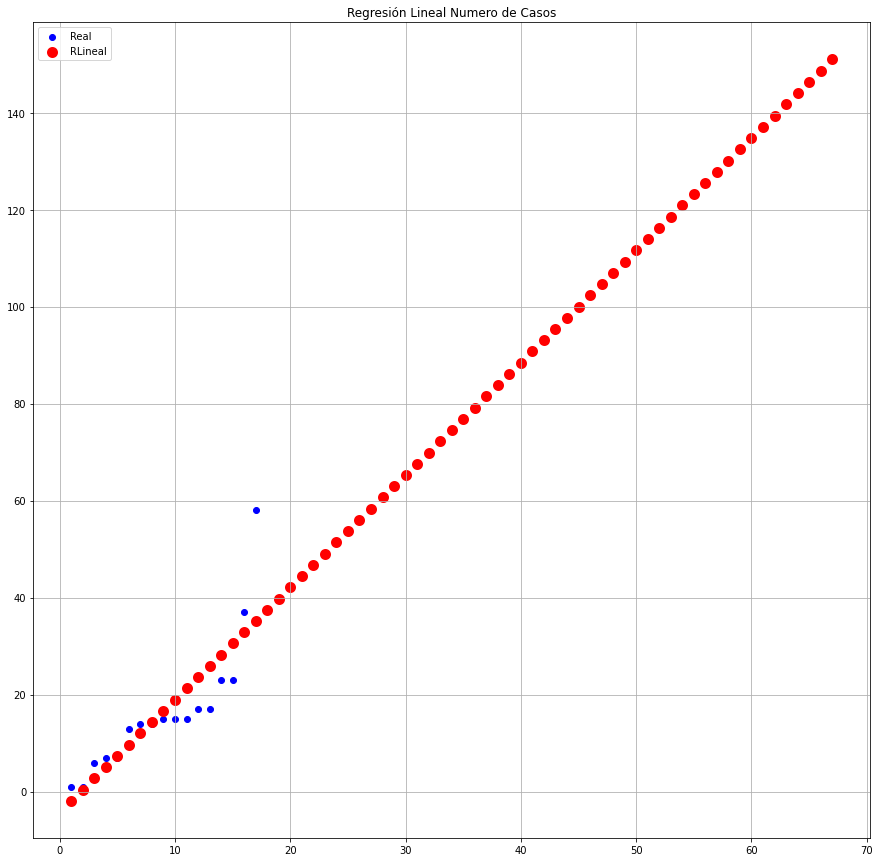

In [13]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1)+51,1)
plt.scatter(x1,fun(x1),color='red',linewidth=5.0,label='RLineal')
plt.legend()
plt.show()

In [14]:

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y1) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 0.07352941176470588, b = -0.4264705882352941
y = 0.07352941176470588x -0.4264705882352941


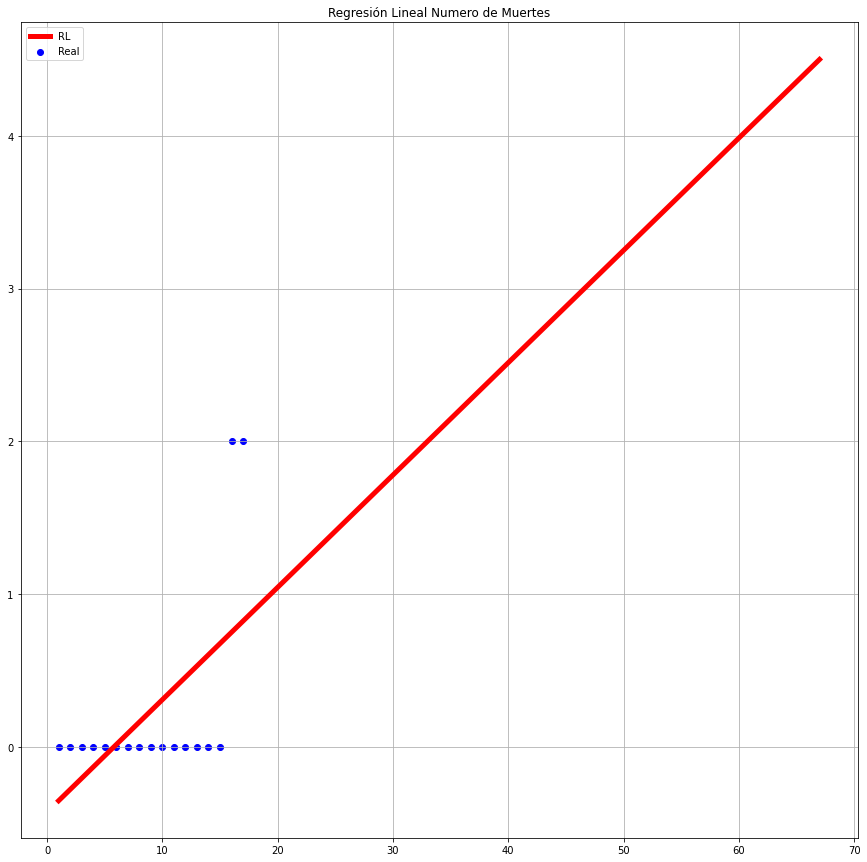

In [15]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(15, 15))
plt.scatter(x,y1,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Muertes');
x2 = np.arange(1,len(ndf1)+51,1)
plt.plot(x2,fun(x2),color='red',linewidth=5.0,label='RL')
plt.legend()
plt.show()